In [117]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

In [118]:
# Input a path to my Git Folder which contains the CSVs

path = (r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\2019 Monthly CSVs")
CSVFiles = glob.glob(path + "/*.csv")

In [119]:
# Create a list to hold data from all 2019 CSV files

list_data = []

In [120]:
# Create a loop which adds each CSV file in the 'Path' folder into the 'list_data' list

for filename in CSVFiles:
    df = pd.read_csv(filename, index_col=None, header=0)
    list_data.append(df)

C:\Users\RebekahDSK\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\RebekahDSK\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\RebekahDSK\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [121]:
# Create a DataFrame containing all the CSV files (for every available month of 2019)
all_data_twozeroonenine_df = pd.concat(list_data, axis=0, ignore_index=True)

# Print a preview of the DataFrame
all_data_twozeroonenine_df.head(5)


,OBJECTID,LOCATION,XCOORD,YCOORD,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,...,LATITUDE,LONGITUDE,MAR_ID,GIS_LAST_MOD_DTTM,DRV_LIC_STATE,DOB_YEAR,VEH_YEAR,VEH_MAKE,TICKET_NUMBER,VIOLATION_TYPE_DESC
0,8730,1400 BRANCH AVE SE,403440.57,133762.28,2019/04/29 04:00:00+00,1:30:00,6.0,METROPOLITAN POLICE DPT-DISTRICT 6,MPD-6D,T043,...,38.872,-76.96,307585.0,2020/09/30 03:44:25+00,DC,1985.0,NaN,CHRY,NaN,NaN
1,8731,I-295 ANACOSTIA FWY,NaN,NaN,2019/04/01 04:00:00+00,9:55:00,6.0,METROPOLITAN POLICE DPT-DISTRICT 6,MPD-6D,T043,...,NaN,NaN,NaN,2020/09/30 03:44:25+00,DC,1972.0,NaN,HOND,NaN,NaN
2,10053,I 395 N/B HOV BRIDGE SW,NaN,NaN,2019/04/18 04:00:00+00,4:20:00,1.0,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T335,...,NaN,NaN,NaN,2020/09/30 03:44:25+00,VA,1987.0,NaN,MAZD,NaN,NaN
3,10054,1000 6TH ST NW,398273.55,137243.91,2019/04/23 04:00:00+00,3:00:00,1.0,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T335,...,38.903,-77.02,807095.0,2020/09/30 03:44:25+00,DC,1993.0,NaN,TOYO,NaN,NaN
4,10055,1000 6TH ST NW,398273.55,137243.91,2019/04/23 04:00:00+00,3:00:00,1.0,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T667,...,38.903,-77.02,807095.0,2020/09/30 03:44:25+00,DC,1993.0,NaN,TOYO,NaN,NaN


In [122]:
# Let's see what columns we're working with

all_data_twozeroonenine_df.columns

Index(['OBJECTID', 'LOCATION', 'XCOORD', 'YCOORD', 'ISSUE_DATE', 'ISSUE_TIME',
       'ISSUING_AGENCY_CODE', 'ISSUING_AGENCY_NAME', 'ISSUING_AGENCY_SHORT',
       'VIOLATION_CODE', 'VIOLATION_PROCESS_DESC', 'PLATE_STATE',
       'ACCIDENT_INDICATOR', 'DISPOSITION_CODE', 'DISPOSITION_TYPE',
       'DISPOSITION_DATE', 'FINE_AMOUNT', 'TOTAL_PAID', 'PENALTY_1',
       'PENALTY_2', 'PENALTY_3', 'PENALTY_4', 'PENALTY_5', 'RP_MULT_OWNER_NO',
       'BODY_STYLE', 'LATITUDE', 'LONGITUDE', 'MAR_ID', 'GIS_LAST_MOD_DTTM',
       'DRV_LIC_STATE', 'DOB_YEAR', 'VEH_YEAR', 'VEH_MAKE', 'TICKET_NUMBER',
       'VIOLATION_TYPE_DESC'],
      dtype='object')

In [127]:
# Clean up the DataFrame to include only the columns we need for analysis

clean_twozeroonenine_df = all_data_twozeroonenine_df.iloc[:, [0, 1, 4, 5, 7, 8, 9, 10, 11, 12, 16, 29, 30, 32]]
clean_twozeroonenine_df.head()

# The resulting DataFrame includes all 11 months (February being our caveat), 1201351 rows, and 14 columns

,OBJECTID,LOCATION,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROCESS_DESC,PLATE_STATE,ACCIDENT_INDICATOR,FINE_AMOUNT,DRV_LIC_STATE,DOB_YEAR,VEH_MAKE
0,8730,1400 BRANCH AVE SE,2019/04/29 04:00:00+00,1:30:00,METROPOLITAN POLICE DPT-DISTRICT 6,MPD-6D,T043,FOLLOW A VEHICLE TOO CLOSELY,DC,N,100.0,DC,1985.0,CHRY
1,8731,I-295 ANACOSTIA FWY,2019/04/01 04:00:00+00,9:55:00,METROPOLITAN POLICE DPT-DISTRICT 6,MPD-6D,T043,FOLLOW A VEHICLE TOO CLOSELY,DC,N,75.0,DC,1972.0,HOND
2,10053,I 395 N/B HOV BRIDGE SW,2019/04/18 04:00:00+00,4:20:00,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T335,FAIL TO CONTROL VEHICLE SPEED TO AVOID COLLIDING,VA,Y,100.0,VA,1987.0,MAZD
3,10054,1000 6TH ST NW,2019/04/23 04:00:00+00,3:00:00,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T335,FAIL TO CONTROL VEHICLE SPEED TO AVOID COLLIDING,DC,Y,150.0,DC,1993.0,TOYO
4,10055,1000 6TH ST NW,2019/04/23 04:00:00+00,3:00:00,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T667,DEAD OR EXPIRED TAGS,DC,Y,100.0,DC,1993.0,TOYO


In [124]:
# Question 4: Total number of violations issued Per Month and For the Year

total_number_of_violations_year = clean_twozeroonenine_df['VIOLATION_CODE'].count()
total_number_of_violations_year

1201351

In [125]:
# Question 4: Total number of violations issued Per Month

# Read in each month's csv
january_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\2019 Monthly CSVs\January_2019.csv")
march_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\2019 Monthly CSVs\March_2019.csv")
april_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\2019 Monthly CSVs\April_2019.csv")
may_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\2019 Monthly CSVs\May_2019.csv")
june_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\2019 Monthly CSVs\June_2019.csv")
july_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\2019 Monthly CSVs\July_2019.csv")
august_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\2019 Monthly CSVs\August_2019.csv")
september_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\2019 Monthly CSVs\September_2019.cvs.csv")
october_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\2019 Monthly CSVs\October_2019.csv")
november_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\2019 Monthly CSVs\November_2019.csv")
december_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\2019 Monthly CSVs\December_2019.csv")


# Count the total number of violations for each month
total_number_violations_january = january_df['VIOLATION_CODE'].count()
total_number_violations_march = march_df['VIOLATION_CODE'].count()
total_number_violations_april = april_df['VIOLATION_CODE'].count()
total_number_violations_may = may_df['VIOLATION_CODE'].count()
total_number_violations_june = june_df['VIOLATION_CODE'].count()
total_number_violations_july = july_df['VIOLATION_CODE'].count()
total_number_violations_august = august_df['VIOLATION_CODE'].count()
total_number_violations_september = september_df['VIOLATION_CODE'].count()
total_number_violations_october = october_df['VIOLATION_CODE'].count()
total_number_violations_november = november_df['VIOLATION_CODE'].count()
total_number_violations_december = december_df['VIOLATION_CODE'].count()

C:\Users\RebekahDSK\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\RebekahDSK\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\RebekahDSK\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [126]:
# Determine what percent each month accounts for of total yearly violations

january_percent_to_year_total = (total_number_violations_january / total_number_of_violations_year * 100)
march_percent_to_year_total = (total_number_violations_march / total_number_of_violations_year * 100)
april_percent_to_year_total = (total_number_violations_april / total_number_of_violations_year * 100)
may_percent_to_year_total = (total_number_violations_may / total_number_of_violations_year * 100)
june_percent_to_year_total = (total_number_violations_june / total_number_of_violations_year * 100)
july_percent_to_year_total = (total_number_violations_july / total_number_of_violations_year * 100)
august_percent_to_year_total = (total_number_violations_august / total_number_of_violations_year * 100)
september_percent_to_year_total = (total_number_violations_september / total_number_of_violations_year * 100)
october_percent_to_year_total = (total_number_violations_october / total_number_of_violations_year * 100)
november_percent_to_year_total = (total_number_violations_november / total_number_of_violations_year * 100)
december_percent_to_year_total = (total_number_violations_december / total_number_of_violations_year * 100)

In [42]:
# Create a DataFrame that displays the total violations for each month, and each month's percent to total violations

total_number_violations_per_month = pd.DataFrame([{
    "Month":"January", "Number of Violations": total_number_violations_january, "Percent to Total":january_percent_to_year_total},
    {"Month":"March", "Number of Violations": total_number_violations_march, "Percent to Total": march_percent_to_year_total},
    {"Month":"April", "Number of Violations": total_number_violations_april, "Percent to Total": april_percent_to_year_total},
    {"Month":"May", "Number of Violations": total_number_violations_may, "Percent to Total": may_percent_to_year_total},
    {"Month":"June", "Number of Violations": total_number_violations_june, "Percent to Total": june_percent_to_year_total},
    {"Month":"July", "Number of Violations": total_number_violations_july, "Percent to Total": july_percent_to_year_total},
     {"Month":"August", "Number of Violations": total_number_violations_august, "Percent to Total": august_percent_to_year_total},
     {"Month":"September", "Number of Violations": total_number_violations_september, "Percent to Total": september_percent_to_year_total},
     {"Month":"October", "Number of Violations": total_number_violations_october, "Percent to Total": october_percent_to_year_total},
     {"Month":"November", "Number of Violations": total_number_violations_november, "Percent to Total": november_percent_to_year_total},
     {"Month":"December", "Number of Violations": total_number_violations_december, "Percent to Total": december_percent_to_year_total},
])
#total_number_violations_per_month = total_number_violations_per_month.set_index("Month")
#total_number_violations_per_month.index.name = 'Month'
total_number_violations_per_month

,Month,Number of Violations,Percent to Total
0,January,94947,7.903352
1,March,105344,8.768794
2,April,108258,9.011355
3,May,110614,9.207467
4,June,143351,11.932483
5,July,114773,9.553661
6,August,149324,12.429673
7,September,102942,8.568853
8,October,98173,8.171883
9,November,94186,7.840007


Text(0.5, 1.0, 'Total Count of Violations per Month for 2019')

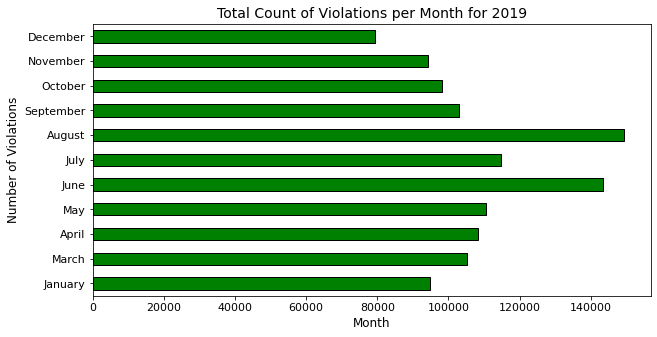

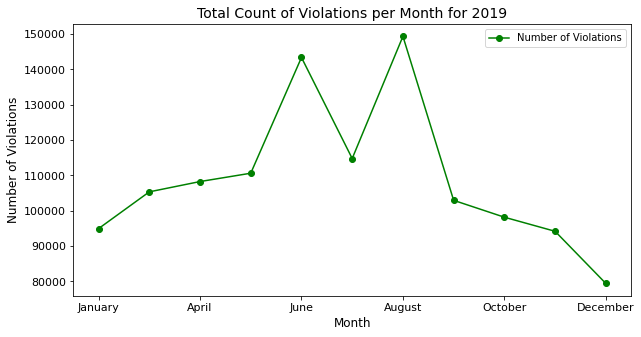

In [128]:
# Need to create two charts:
    # Bar chart for number of violations per month
    # Line chart for number of violations per month

total_number_violations_per_month.plot(kind='barh', x='Month', y='Number of Violations', legend=False, color='green', edgecolor = 'black', figsize=(10,5), fontsize=11)
plt.ylabel('Number of Violations', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Total Count of Violations per Month for 2019', fontsize=14)



total_number_violations_per_month.plot(kind='line', x='Month', y='Number of Violations', color='green', marker = 'o', figsize=(10,5), fontsize=11)
plt.ylabel('Number of Violations', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Total Count of Violations per Month for 2019', fontsize=14)


In [92]:
# Bar chart for % of each month to the year


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 8 Text major ticklabel objects>)

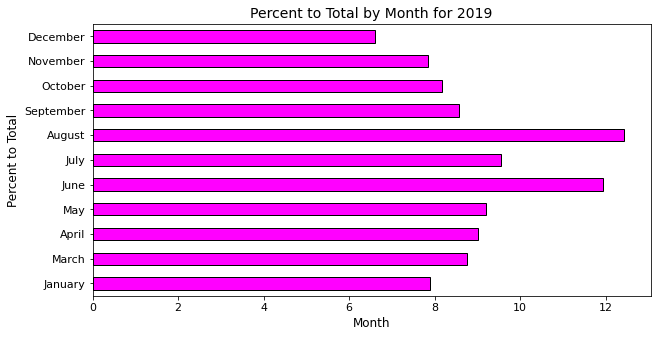

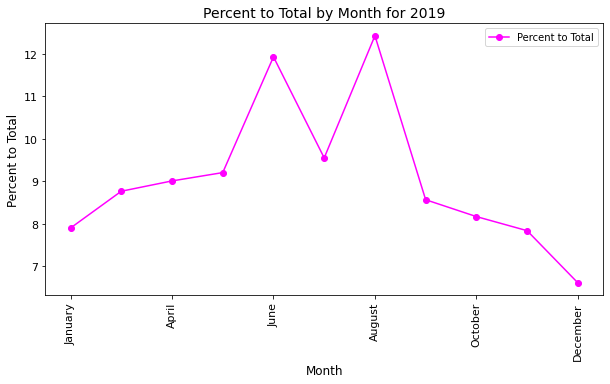

In [111]:
total_number_violations_per_month.plot(kind='barh', x='Month', y='Percent to Total', legend=False, color='magenta', edgecolor = 'black', figsize=(10,5), fontsize=11)
plt.ylabel('Percent to Total', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Percent to Total by Month for 2019', fontsize=14)

total_number_violations_per_month.plot(kind='line', x='Month', y='Percent to Total', color='magenta', marker = 'o', figsize=(10,5), fontsize=11)
plt.ylabel('Percent to Total', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Percent to Total by Month for 2019', fontsize=14)
plt.xticks(rotation=90)

In [19]:
# QUESTION 5: Obtain the count of each violation in each month

# Obtain the count of each violation for each month while dropping all unnecessary columns
# Rename the column
# Rename the index
# Repeat for each month

january_violations = january_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
january_violations = january_violations.rename(columns =  {'OBJECTID':'JANUARY'})
january_violations.index.name = 'VIOLATION DESCRIPTION'


march_violations = march_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
march_violations = march_violations.rename(columns =  {'OBJECTID':'MARCH'})
march_violations.index.name = 'VIOLATION DESCRIPTION'


april_violations = april_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
april_violations = april_violations.rename(columns =  {'OBJECTID':'APRIL'})
april_violations.index.name = 'VIOLATION DESCRIPTION'


may_violations = may_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
may_violations = may_violations.rename(columns =  {'OBJECTID':'MAY'})
may_violations.index.name = 'VIOLATION DESCRIPTION'


june_violations = june_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
june_violations = june_violations.rename(columns =  {'OBJECTID':'JUNE'})
june_violations.index.name = 'VIOLATION DESCRIPTION'


july_violations = july_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
july_violations = july_violations.rename(columns =  {'OBJECTID':'JULY'})
july_violations.index.name = 'VIOLATION DESCRIPTION'


august_violations = august_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
august_violations = august_violations.rename(columns =  {'OBJECTID':'AUGUST'})
august_violations.index.name = 'VIOLATION DESCRIPTION'


september_violations = september_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
september_violations = september_violations.rename(columns =  {'OBJECTID':'SEPTEMBER'})
september_violations.index.name = 'VIOLATION DESCRIPTION'


october_violations = october_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
october_violations = october_violations.rename(columns =  {'OBJECTID':'OCTOBER'})
october_violations.index.name = 'VIOLATION DESCRIPTION'


november_violations = november_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
november_violations = november_violations.rename(columns =  {'OBJECTID':'NOVEMBER'})
november_violations.index.name = 'VIOLATION DESCRIPTION'


december_violations = december_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
december_violations = december_violations.rename(columns =  {'OBJECTID':'DECEMBER'})
december_violations.index.name = 'VIOLATION DESCRIPTION'
december_violations

,DECEMBER
VIOLATION DESCRIPTION,
ALTERED TAGS,1
BACK UP WITHOUT CAUTION,14
BACKING TO TURN,2
BAD FOOT BRAKES,1
BIKE/PMD FAIL TO YIELD RIGHT OF WAY TO PED OR VEH,1
...,...
VIOLATION OF ONE WAY STREET RESTRICTION,10
VIOLATION OF RESTRICTION ON LEARNER'S PERMIT,12
VIOLATION OF THE CHILD RESTRAINT ACT,12


In [22]:
# QUESTION 5 CONTINUED
# Merge each months count together so that we have the total count of each violation per month for the whole 2019 year

jan_march = pd.merge(january_violations, march_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
jan_march

with_april = pd.merge(jan_march, april_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
with_april

with_may = pd.merge(with_april, may_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
with_may

with_june = pd.merge(with_may, june_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
with_june

with_july = pd.merge(with_june, july_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
with_july

with_august = pd.merge(with_july, august_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
with_august

with_september = pd.merge(with_august, september_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
with_september

with_october = pd.merge(with_september, october_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
with_october

with_november = pd.merge(with_october, november_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
with_november

violation_count_per_month_for_the_year = pd.merge(with_november, december_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')

# Replance NaN with 0
violation_count_per_month_for_the_year = violation_count_per_month_for_the_year.replace(np.nan,0)
violation_count_per_month_for_the_year

violation_count_per_month_for_the_year['YEARLY TOTALS'] = counts
#violation_count_per_month_for_the_year


In [23]:
# QUESTION 5 CONTINUED
# Create a 'TOTAL' columns that adds up each violations across the months to give a total for the year

counts = violation_count_per_month_for_the_year['JANUARY'] + violation_count_per_month_for_the_year['MARCH'] + violation_count_per_month_for_the_year['APRIL'] + violation_count_per_month_for_the_year['MAY'] + \
violation_count_per_month_for_the_year['JUNE'] + violation_count_per_month_for_the_year['JULY'] + violation_count_per_month_for_the_year['AUGUST'] + \
violation_count_per_month_for_the_year['SEPTEMBER'] + violation_count_per_month_for_the_year['OCTOBER'] + violation_count_per_month_for_the_year['NOVEMBER'] + \
violation_count_per_month_for_the_year['DECEMBER']



In [16]:
# QUESTION 5 CONTINUED
# Determine the percent of each violation compared to the year's total number of violations

percent = round(counts / total_number_of_violations_year* 100,10)
violation_count_per_month_for_the_year['PERCENT TO TOTAL VIOLATIONS'] = percent
violation_count_per_month_for_the_year

,JANUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,PERCENT TO TOTAL VIOLATIONS
VIOLATION DESCRIPTION,,,,,,,,,,,,
ALTERED TAGS,4.0,4.0,1.0,3.0,6.0,4.0,6.0,7.0,1.0,5.0,1.0,0.003496
ALTERING A DRIVING PERMIT,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.000666
BACK UP WITHOUT CAUTION,19.0,25.0,22.0,24.0,21.0,26.0,26.0,18.0,22.0,14.0,14.0,0.019228
BACKING TO TURN,1.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.000749
BAD FOOT BRAKES,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,1.0,0.001332
...,...,...,...,...,...,...,...,...,...,...,...,...
VIOLATE BRIDGE LOAD LIMIT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000083
FAIL TO PROCEED WITH CAUTION THROUGH AN INCIDENT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000083
NO SNOW TIRE OR CHAIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000083


In [18]:
# QUESTION 5 CONTINUED
# sort the table according to the violations with the highest percentage

sorted_violation_count_per_month_for_the_year = violation_count_per_month_for_the_year.sort_values(['PERCENT TO TOTAL VIOLATIONS'], ascending=False)
sorted_violation_count_per_month_for_the_year

,JANUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,PERCENT TO TOTAL VIOLATIONS
VIOLATION DESCRIPTION,,,,,,,,,,,,
SPEED 11-15 MPH OVER THE SPEED LIMIT,66246.0,73293.0,76465.0,75605.0,99232.0,72579.0,103765.0,67876.0,66086.0,62741.0,55544.0,68.209208
SPEED 16-20 MPH OVER THE SPEED LIMIT,12060.0,12931.0,13334.0,13297.0,20866.0,21390.0,23112.0,14368.0,14122.0,14341.0,10342.0,14.164303
FAIL TO STOP PER REGULATIONS FACING RED SIGNAL,4696.0,5073.0,5305.0,5737.0,5585.0,5033.0,4659.0,4534.0,4590.0,3989.0,3459.0,4.383398
PASSING STOP SIGN WITHOUT COMING TO A FULL STOP,2595.0,2795.0,2837.0,4111.0,5205.0,3800.0,4882.0,5305.0,3293.0,2619.0,1622.0,3.251672
SPEED 21-25 MPH OVER THE SPEED LIMIT,1949.0,2239.0,2274.0,2231.0,3678.0,3737.0,4538.0,2901.0,2761.0,3176.0,1792.0,2.603402
...,...,...,...,...,...,...,...,...,...,...,...,...
PASS ON A HILL,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000083
REMOVE INSPECTION STICKER,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000083
BAD HAND BRAKES,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000083


In [129]:
# Gene's Code 
#From the issuing agency column which issuing agency issues the most violations? (MAX) ***dataframe['name'].value_counts().idxmax()***
issuing_agency_most = clean_twozeroonenine_df['ISSUING_AGENCY_NAME'].value_counts()

df_max_agency=pd.DataFrame(issuing_agency_most)
max_agency = df_max_agency.iloc[0]
max_agency


ISSUING_AGENCY_NAME    1124348
Name: SPECIAL OPERATION DIV & TRAFFIC DIV, dtype: int64

In [130]:
# From the issuing agency column which issuing agency issues the least violations? (MIN)
#PATROL SERVICES BUREAU 
min_agency = df_max_agency.iloc[-1]
min_agency

ISSUING_AGENCY_NAME    1
Name: MAJOR NARCOTICS BRANCH, dtype: int64

In [131]:
# Gene's Code 
# From the location column what area issues the most violations (Are more violations issued in a particular area of the city?)
area_issues_most = clean_twozeroonenine_df['LOCATION'].value_counts()

df_area=pd.DataFrame(area_issues_most)
max_area = df_area.iloc[0]
max_area

LOCATION    94889
Name: DC 295 .4mi s/o PA Ave SE sw/b (WZ), dtype: int64

In [132]:
# Gene's Code 
# From the location column what area issues the least violations (Are more violations issued in a particular area of the city?)
min_area = df_area.iloc[-1]
min_area

LOCATION    1
Name: BLOCK 3600 BENNING RD NE EASTBOUND, dtype: int64